# Project Part 2: Benchmark and Optimization

In this milestone you will provide a report which includes the results of your benchmark and optimization.  Your report will include a performance benchmark on a single core and then a description of what you did to speed up the code and a graph of how much improvement you made over the benchmark.  Your final report should include the following:

- Project Title
- Motivating Image
- Abstract
- Methodology
- Timing Results
- Concluding Discussion and Future Work
- References


To help you out your instructor has provided the following template


---- START TEMPLATE ----

# Part 2 - Project Title 

By "Justin Wijaya"

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

<img alt="Simple Icon of a camera. This is just a place holder for your image" src="https://miro.medium.com/v2/resize:fit:720/1*VSQ0XEywxSgZBwW05GsZtw.png" width="20%">

Image from: [https://navaneethsdk.medium.com](https://navaneethsdk.medium.com/getting-started-with-pytorch-4fa1a5ee1502)

---
# Abstract

&#9989;  Provide a short paragraph about the software and scientific/engineering domain you cover in your project (research area, sports, economics, etc). Explain why you picked this domain (i.e. what is your motivation). Explain how computation is used in this domain. Give a short description of what you did and a summary of results.  

This project covers the domain of image classification using the Fashion-MNIST dataset. The motivation stems from its relevance in e-commerce and fashion recommendation systems, in which accurately categorizing clothing is essential. In this domain, computation is used to train the model, evaluate the results, optimize parameters, and predict using new data. I compared the performance of an image classifier with its serial form and with PyTorch's usage of GPUs. summary results

---
# Methodology

&#9989;  Provide a more detailed description about what you did for this project.  Include detailed instructions needed to reprodue the project.  These instructions should be detailed enough for a future student to be able to read the report, reproduce your results and pick up where you left off. 

To optimize the code, I used some of PyTorch's built-in functions to utilize CUDA in its computations for training the model. The specific modifications consist of setting the device to CUDA (instead of the cpu) and moving all the tensors and the model to the device. The general layout of the code can be found in the `Test_Notebook.ipynb` file. The bash script to produce these results is `benchmarker.sh`.

Also, make sure to run the following commands before testing directly*:
```bash
    module load PyTorch/2.1.2-foss-2023a-CUDA-12.1.1
    module load torchvision/0.16.0-foss-2023a-CUDA-12.1.1
```
*This is automatically done in bash script

---
# Timing Results

&#9989;  Show the results of a baseline experiment on a single core and after optimization.  Also include a graph of the results. 


&#9989;  Provide the results of a benchmark or scaling study for your project.  Make sure you include a description of the hardware that was used and graph the results.  Make sure you include detailed descriptions about the hardware that was used.  Graphs alone are not sufficient, explain the graphs. Did they meet expectations?  Was there any anomalies?

With the implementation out of the way, we can discuss the benchmarks. We can figure out the runtimes and accuracies for each optimization version through a test. These tests were run on the HPCC using the v100 GPUs on the developer node amd20-v100.

In [27]:
# library
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# runtimes
serial_t = 32.779
oneGPU_t = 34.585
twoGPU_t = 55.268
threeGPU_t = 59.476

# accuracies
serial_a = 0.7384
oneGPU_a = 0.7313
twoGPU_a = 0.738
threeGPU_a = 0.7314

With the results in, we can see for ourselves how well each optimization version fares in runtime and accuracy compared to each other:

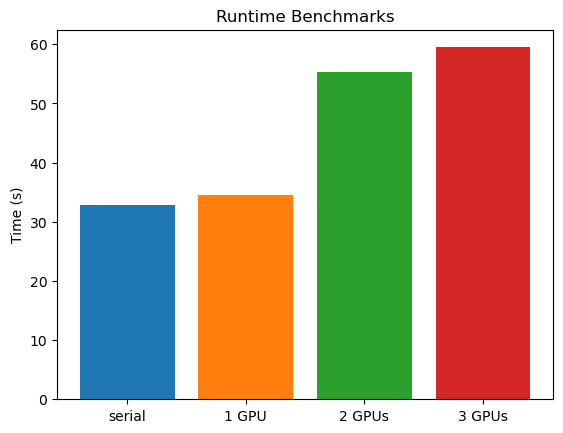

In [30]:
# plot runtimes
plt.bar('serial',serial_t)
plt.bar('1 GPU',oneGPU_t)
plt.bar('2 GPUs',twoGPU_t)
plt.bar('3 GPUs',threeGPU_t)
plt.title('Runtime Benchmarks')
plt.ylabel('Time (s)')
plt.show()

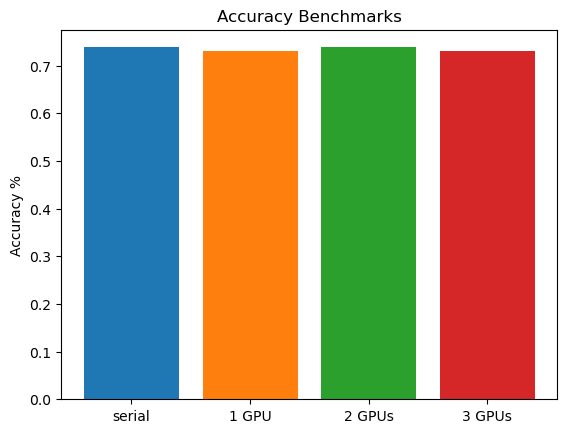

In [31]:
# plot accuracies
plt.bar('serial',serial_a)
plt.bar('1 GPU',oneGPU_a)
plt.bar('2 GPUs',twoGPU_a)
plt.bar('3 GPUs',threeGPU_a)
plt.title('Accuracy Benchmarks')
plt.ylabel('Accuracy %')
plt.show()

- The runtime graph doesn't meet my expectations. I expected that using more GPUs would lead to better performance overall.
    - This may be due to how DataParallel works. It works similarly to how MPI works: there is a leading worker and the other workers which share information between each other. That may lead to some communication overhead, hence the runtime trend we see now.
    - It could also be due to the relatively small amount of data which leads to redundancy in the utilization of GPUs.
- The accuracy graph makes sense, as we're basically doing the same amount of work with every variation of optimization.

Let's take a look to what the performance is like for a classifier of a larger dataset:

In [52]:
# runtimes
serial_t = 118.986
oneGPU_t = 47.986
twoGPU_t = 108.072
threeGPU_t = 107.729

# accuracies
serial_a = 0.2742
oneGPU_a = 0.2992
twoGPU_a = 0.2578
threeGPU_a = 0.2663

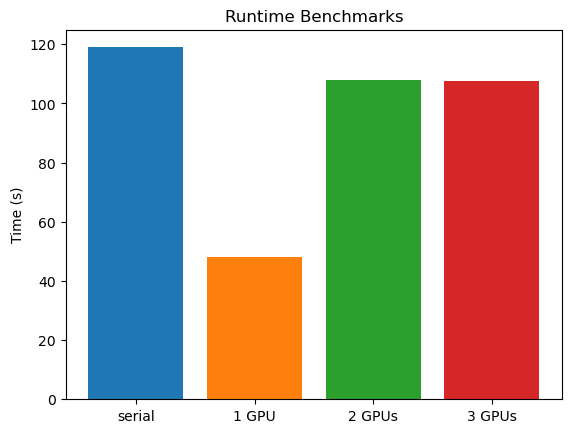

In [54]:
# plot runtimes
plt.bar('serial',serial_t)
plt.bar('1 GPU',oneGPU_t)
plt.bar('2 GPUs',twoGPU_t)
plt.bar('3 GPUs',threeGPU_t)
plt.title('Runtime Benchmarks')
plt.ylabel('Time (s)')
plt.show()

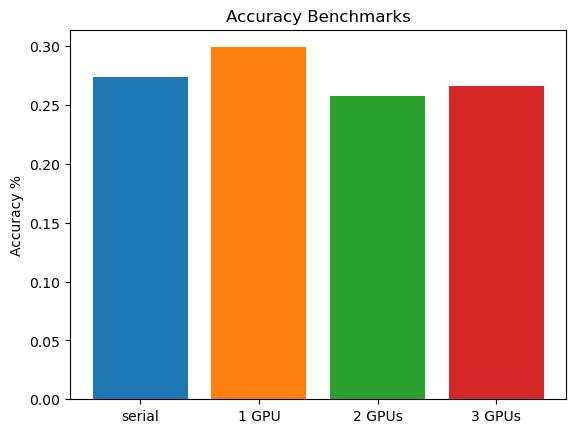

In [56]:
# plot accuracies
plt.bar('serial',serial_a)
plt.bar('1 GPU',oneGPU_a)
plt.bar('2 GPUs',twoGPU_a)
plt.bar('3 GPUs',threeGPU_a)
plt.title('Accuracy Benchmarks')
plt.ylabel('Accuracy %')
plt.show()

- Given what I learned from the MNIST tests, this result makes sense.
- acc

---
# Concluding Discussion and Future Work

&#9989;  Give another short description of the project and your final results.  Use this to talk about what you learned in this project.  Include what you found interesting and what would be a next step.  

lob

---
# References

&#9989;  Include links to websites and resources used in this project.  

- https://pytorch.org/get-started/locally/
- https://stackoverflow.com/questions/54216920/how-to-use-multiple-gpus-in-pytorch
- https://medium.com/@BetterEverything/passing-data-to-a-python-file-when-running-it-with-commands-3cc437667b2b
- https://bobbyhadz.com/blog/python-pip-install-silent-non-interactive-mode

---- END TEMPLATE ----

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----